In [1]:
import pickle
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from sklearn.cluster import KMeans
import re
from sklearn.decomposition import PCA
from collections import *


file = open(r"C:\Users\Mahmo\Desktop\BCM_SIDS_ML_Summer_22\data\trials_breath.obj", "rb")
trials_breath = pickle.load(file)
file = open(r"C:\Users\Mahmo\Desktop\BCM_SIDS_ML_Summer_22\data\trials_ecg.obj", "rb")
trials_ecg = pickle.load(file)
file = open(r"C:\Users\Mahmo\Desktop\BCM_SIDS_ML_Summer_22\data\static_data.obj", "rb")
static_data = pickle.load(file)
file = open(r"C:\Users\Mahmo\Desktop\BCM_SIDS_ML_Summer_22\data\trials_raw.obj", "rb")
trials_raw = pickle.load(file)
metadata = pd.read_csv(r"C:\Users\Mahmo\Desktop\BCM_SIDS_ML_Summer_22\data\d2k project metadata.csv")

In [23]:
trials_raw["M21488"]["raw"]

,Timestamp,Breathing_flow_signal,O2_sensor_data,CO2_sensor_data,Chamber_temperature,ECG,Heart_Rate,Integrated_Flow,Breathing,trial_no
17799,17.799999,-0.213125,2.090625,-0.000312,35.0000,-0.000656,NaN,-3.593165,0.000120,0.0
17800,17.801001,-0.215000,2.090313,0.000000,34.6875,0.000577,NaN,-3.593380,0.000112,0.0
17801,17.802000,-0.215312,2.090937,-0.000312,34.6875,-0.000061,NaN,-3.593594,0.000112,0.0
17802,17.802999,-0.214375,2.090937,-0.000312,34.3750,-0.000072,NaN,-3.593809,0.000103,0.0
17803,17.804001,-0.214375,2.090625,0.000000,34.6875,-0.000398,NaN,-3.594024,0.000103,0.0
...,...,...,...,...,...,...,...,...,...,...
5063696,5063.745117,-0.204063,2.086562,0.008750,34.6875,-0.005134,NaN,-972.729797,-0.169361,8.0
5063697,5063.746094,-0.201250,2.085938,0.008438,34.6875,-0.003884,NaN,-972.729980,-0.169498,8.0
5063698,5063.747070,-0.202500,2.085625,0.008750,34.3750,-0.000446,NaN,-972.730225,-0.169704,8.0
5063699,5063.748047,-0.201875,2.085625,0.009062,34.6875,-0.002634,NaN,-972.730408,-0.169979,8.0


In [4]:

def compute_timestamps(metadata, mouse_id, phase, phase2 = None, phase3 = None, phase4 = None):
    """
    Given the phase and metadata, this function returns all the timestamps in which
    the given phase occurs in seconds
    """
        
    timestamps_in_hms = list(metadata[((metadata["Comment"] == phase) | (metadata["Comment"] == phase2) | (metadata["Comment"] == phase3) | (metadata["Comment"] == phase4)) & (metadata["source file"] == mouse_id)]["Time"])
    timestamps_in_s = []
    for timestamp in timestamps_in_hms:
        processed_timestamp = re.split(':', timestamp)
        timestamp = [float(i) for i in processed_timestamp]
        
        if len(timestamp) == 2:
            timestamps_in_s.append(60*timestamp[0]+timestamp[1])
        elif len(timestamp) == 3:
            timestamps_in_s.append(3600*timestamp[0]+60*timestamp[1]+timestamp[2])

    sorted_timestamps = sorted(timestamps_in_s)

    return sorted_timestamps
    

In [4]:
metadata["Comment"].unique()

array(['Cal 20 Room Air', 'Pre-CNO Room Air', 'Post-CNO Room Air', '1',
       'apnea starts', 'R1', 'first gasp', 'HR recovery',
       'eupnea recovery', '2', 'R2', '3', 'R3', '4', 'R4', '5', 'R5', '6',
       'R6', '7', 'R7', '8', 'R8', 'Hr recovery', '9', 'R9', '10', 'R10',
       'eupnea starts', 'Cal 5 Room Air', 'Pre-CNo Room Air',
       'Post-CNo Room Air', 'hr recovery', '11', 'R11', '12', 'R12', '13',
       'R13', '14', 'R14', 'HR recovery - No signal', 'apea starts', '15',
       'R15'], dtype=object)

In [6]:
phase_info_Df, min_length, phases_df = retrieve_phase(metadata, trials_raw, static_data, trials_breath,"Breathing_flow_signal", label1="eupnea starts", label2 = "eupnea recovery", trial_onset_first=False)

Currently retrieving interval information for mouse M20864. Progress: 5.0%
Currently retrieving interval information for mouse M20865. Progress: 10.0%
Currently retrieving interval information for mouse M20867. Progress: 15.0%
Currently retrieving interval information for mouse M20868. Progress: 20.0%
Currently retrieving interval information for mouse M20869. Progress: 25.0%
Currently retrieving interval information for mouse M20870. Progress: 30.0%
Currently retrieving interval information for mouse M20874. Progress: 35.0%
Currently retrieving interval information for mouse M21480. Progress: 40.0%
Currently retrieving interval information for mouse M21481. Progress: 45.0%
Currently retrieving interval information for mouse M21483. Progress: 50.0%
Currently retrieving interval information for mouse M21484. Progress: 55.00000000000001%
Currently retrieving interval information for mouse M21486. Progress: 60.0%
Currently retrieving interval information for mouse M21487. Progress: 65.0%


In [36]:
phases_df["M21488"][2]

,index,Breathing_flow_signal
0,2547779,-0.272500
1,2547780,-0.271562
2,2547781,-0.270312
3,2547782,-0.270312
4,2547783,-0.265938
...,...,...
286995,2834774,-0.180000
286996,2834775,-0.174688
286997,2834776,-0.171875
286998,2834777,-0.168437


In [67]:
phase = trials_breath["M21488"]["breath"][(trials_breath["M21488"]["breath"]["Timestamp_Inspiration"] > 2550) & (trials_breath["M21488"]["breath"]["Timestamp_Inspiration"] < 2800)]

In [69]:
phase[400:410]

,Unnamed: 0,Mouse_And_Session_ID,Man_Condition,Breath Number,Timestamp_Inspiration,Timestamp_Expiration,Inspiratory_Duration,Irreg_Score_Inspiratory_Duration,Expiratory_Duration,Irreg_Score_Expiratory_Duration,...,Analysis_Parameter_TTwin,Analysis_Parameter_per500win,Analysis_Parameter_maxPer500,Analysis_Parameter_maxDVTV,Analysis_Parameter_minApSec,Analysis_Parameter_minApsTT,Analysis_Parameter_minAplTT,Analysis_Parameter_SIGHwin,Analysis_Parameter_SmoothFilt,trial_no
7295,7295,M21488,full_recording,2657044,2657.044,2657.195,0.151,0.451923,0.139,0.067114,...,7,201,1.0,100,0.5,2,2,11,y,3
7296,7296,M21488,full_recording,2657334,2657.334,2657.492,0.158,0.046358,0.121,0.129496,...,7,201,1.0,100,0.5,2,2,11,y,3
7297,7297,M21488,full_recording,2657613,2657.613,2657.731,0.118,0.253165,0.153,0.264463,...,7,201,1.0,100,0.5,2,2,11,y,3
7298,7298,M21488,full_recording,2657884,2657.884,2658.042,0.158,0.338983,0.149,0.026144,...,7,201,1.0,100,0.5,2,2,11,y,3
7299,7299,M21488,full_recording,2658191,2658.191,2658.341,0.150,0.050633,0.163,0.093960,...,7,201,1.0,100,0.5,2,2,11,y,3
7300,7300,M21488,full_recording,2658504,2658.504,2658.674,0.170,0.133333,0.147,0.098160,...,7,201,1.0,100,0.5,2,2,11,y,3
7301,7301,M21488,full_recording,2658821,2658.821,2658.976,0.155,0.088235,0.148,0.006803,...,7,201,1.0,100,0.5,2,2,11,y,3
7302,7302,M21488,full_recording,2659124,2659.124,2659.276,0.152,0.019355,0.141,0.047297,...,7,201,1.0,100,0.5,2,2,11,y,3
7303,7303,M21488,full_recording,2659417,2659.417,2659.584,0.167,0.098684,0.142,0.007092,...,7,201,1.0,100,0.5,2,2,11,y,3
7304,7304,M21488,full_recording,2659726,2659.726,2659.827,0.101,0.395210,0.140,0.014085,...,7,201,1.0,100,0.5,2,2,11,y,3


(171,)


Text(0.5, 1.0, 'Spectrogram of the Unfiltered Signal, NFFT = 128, Overlap = 64, Showing Only 0 - 40 Hz')

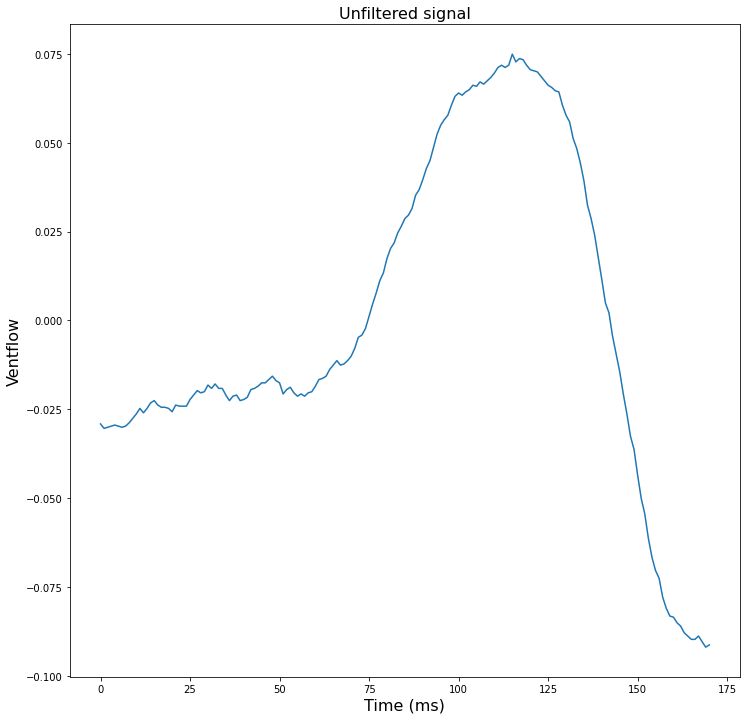

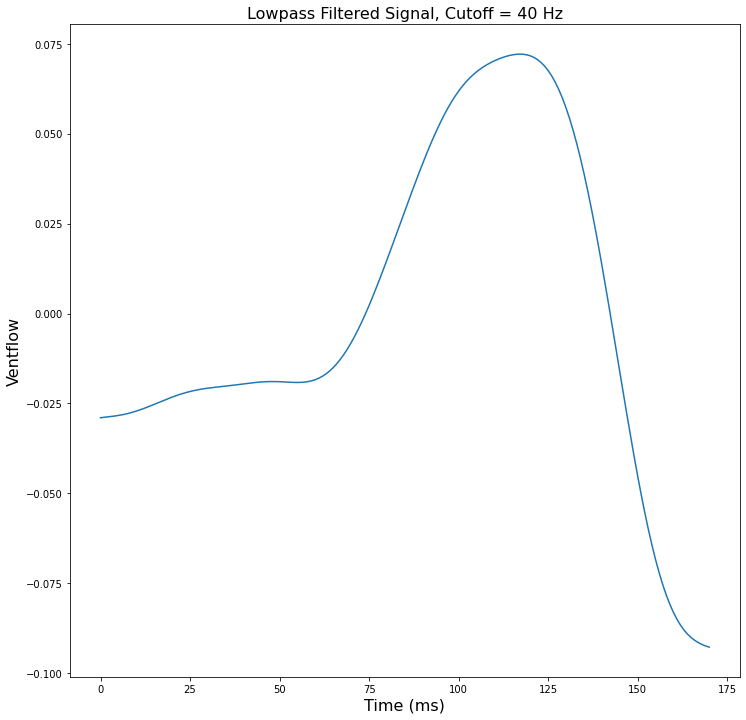

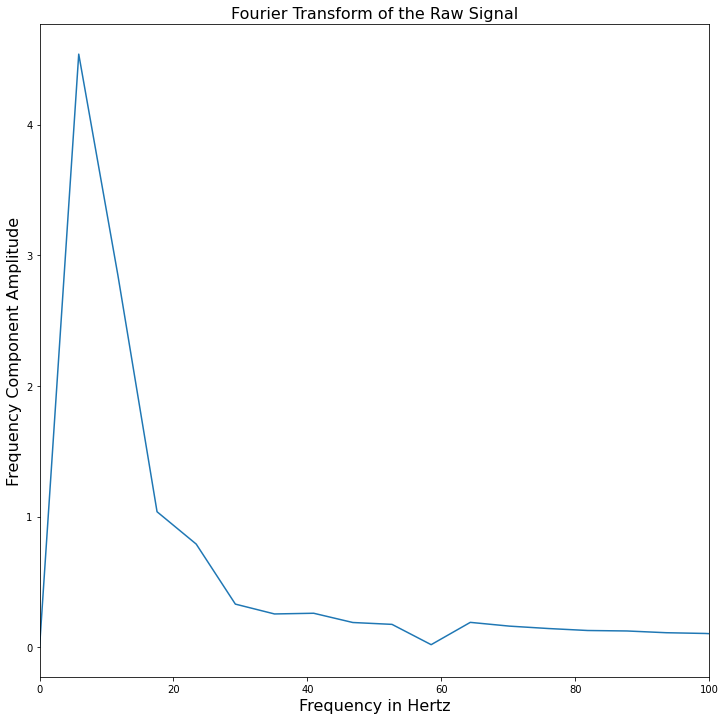

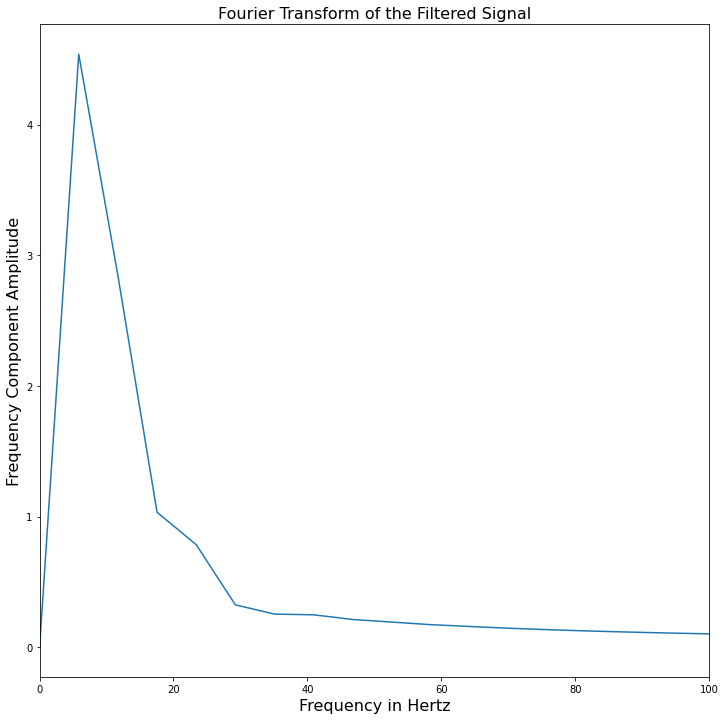

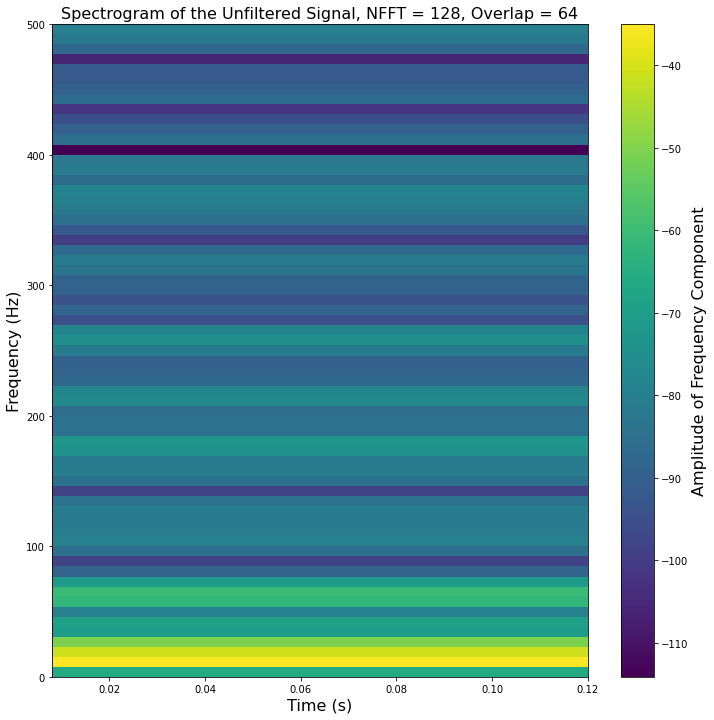

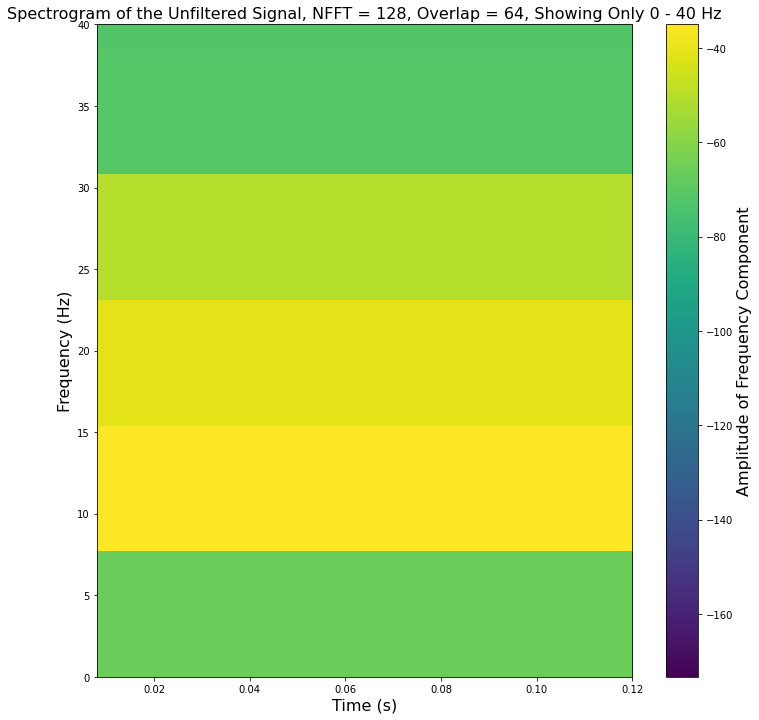

In [76]:
from scipy.fft import rfft, rfftfreq
from scipy.signal import butter, filtfilt

def butter_lowpass(cutoff, fs, order=5):
        nyq = 0.5 * fs
        cut = cutoff / nyq        
        a,b = butter(order, cut, analog=False, btype='low',output = 'ba')
        return a,b

def butter_bandpass_filter(data, cutoff, fs, order=5):
        a,b = butter_lowpass(cutoff, fs, order=order)
        y = filtfilt(a,b, data)
        return y

def run(data):
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 1000.0
    cutoff = 40

    plt.figure(figsize = (12,12))
    plt.plot(data, label='Raw signal')
    plt.title("Unfiltered signal", size = 16)
    plt.xlabel("Time (ms)", size = 16)
    plt.ylabel("Ventflow", size = 16)

    filtered_data = butter_bandpass_filter(data, cutoff, fs, order =6)

    plt.figure(figsize = (12,12))
    plt.plot(filtered_data)
    plt.title("Lowpass Filtered Signal, Cutoff = {} Hz" .format(cutoff), size = 16)
    plt.xlabel("Time (ms)", size = 16)
    plt.ylabel("Ventflow", size = 16)

    return filtered_data

breath_start = 2658504
breath_end = 2658674

breath_one = phases_df["M21488"][2][(phases_df["M21488"][2]["index"] >= breath_start) & (phases_df["M21488"][2]["index"] <= breath_end)]

signal = np.array(breath_one["Breathing_flow_signal"]) - np.average(breath_one["Breathing_flow_signal"])

filtered_signal = run(signal)

SAMPLE_RATE = 1000
N = breath_end - breath_start + 1

print(np.shape(signal))
yf = rfft(signal)
xf = rfftfreq(math.ceil(N), 1 / SAMPLE_RATE)
plt.figure(figsize = (12,12))
plt.plot(xf, np.abs(yf))
plt.xlabel('Frequency in Hertz', size= 16)
plt.ylabel("Frequency Component Amplitude", size= 16)
plt.xlim(0,100)
plt.title("Fourier Transform of the Raw Signal", size= 16)

yf = rfft(filtered_signal)
xf = rfftfreq(math.ceil(N), 1 / SAMPLE_RATE)
plt.figure(figsize = (12,12))
plt.plot(xf, np.abs(yf))
plt.xlabel('Frequency in Hertz', size= 16)
plt.ylabel("Frequency Component Amplitude", size= 16)
plt.xlim(0,100)
plt.title("Fourier Transform of the Filtered Signal", size= 16)

plt.figure(figsize = (12,12))
spectrum, freqs, t, im = plt.specgram(signal, Fs = 1000, mode = "magnitude", NFFT = 128, noverlap = 16)
plt.xlabel("Time (s)", size = 16)
plt.ylabel("Frequency (Hz)", size = 16)
cbar = plt.colorbar()
cbar.set_label('Amplitude of Frequency Component', rotation=90, size = 16)
plt.title("Spectrogram of the Unfiltered Signal, NFFT = 128, Overlap = 64", size = 16)

plt.figure(figsize = (12,12))
spectrum, freqs, t, im = plt.specgram(filtered_signal, Fs = 1000, mode = "magnitude", NFFT = 128, noverlap = 16)
plt.xlabel("Time (s)", size = 16)
plt.ylabel("Frequency (Hz)", size = 16)
plt.ylim(0,40)
cbar = plt.colorbar()
cbar.set_label('Amplitude of Frequency Component', rotation=90, size = 16)
plt.title("Spectrogram of the Unfiltered Signal, NFFT = 128, Overlap = 64, Showing Only 0 - 40 Hz", size = 16)

C:\Users\Mahmo\AppData\Local\Temp\ipykernel_12960\1431326938.py:2: UserWarning: Only one segment is calculated since parameter NFFT (=128) >= signal length (=116).
  spectrum, freqs, t, im = plt.specgram(signal, Fs = 1000, mode = "magnitude", NFFT = 128, noverlap = 16)


Text(0.5, 1.0, 'Spectrogram of the Signal, NFFT = 128, Overlap = 64')

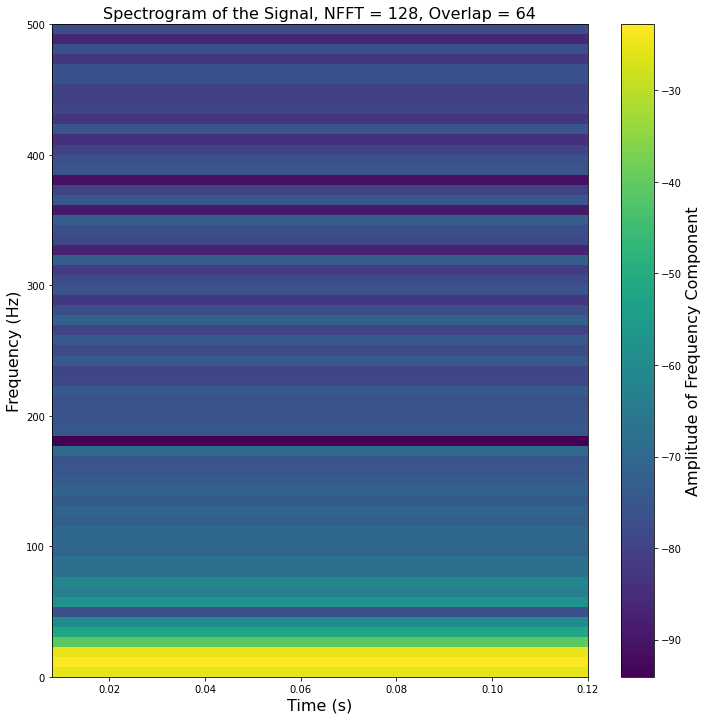

In [59]:
plt.figure(figsize = (12,12))
spectrum, freqs, t, im = plt.specgram(signal, Fs = 1000, mode = "magnitude", NFFT = 128, noverlap = 16)
plt.xlabel("Time (s)", size = 16)
plt.ylabel("Frequency (Hz)", size = 16)
cbar = plt.colorbar()
cbar.set_label('Amplitude of Frequency Component', rotation=90, size = 16)
plt.title("Spectrogram of the Signal, NFFT = 128, Overlap = 64", size = 16)